In [1]:
import bpy
from IPython.display import display, Image

def fresh_scene():
    # Deselect all objects
    bpy.ops.object.select_all(action='DESELECT')
    # Select all objects except cameras
    for obj in bpy.context.scene.objects:
        if  obj.type != 'CAMERA':
            obj.select_set(True)
        else:
            obj.select_set(False)
    bpy.ops.object.delete()
    
    # add light
    bpy.ops.object.light_add(type='SUN')
    sun = bpy.context.object

    sun.location = (0, 0, 0)
    from math import radians
    sun.rotation_euler = (radians(204), radians(-133), radians(-67))
    sun.data.energy = 5  


def render_result():
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath="img.png")
    display(Image(filename="img.png"))

bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 200

# Pipe data

In [2]:
# temp
bpy.ops.wm.save_as_mainfile(filepath="scene.blend")

Info: Total files 0 | Changed 0 | Failed 0
Info: Saved "scene.blend"


{'FINISHED'}

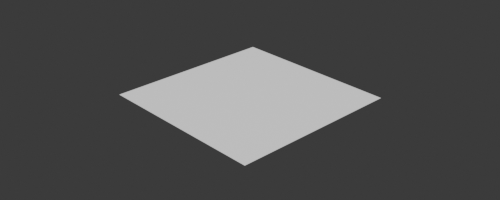

In [3]:
fresh_scene()
bpy.ops.mesh.primitive_plane_add(size=3, location=(0, 0, 0))  
plane = bpy.context.object

render_result()

and this is how the spreadsheet looks like:
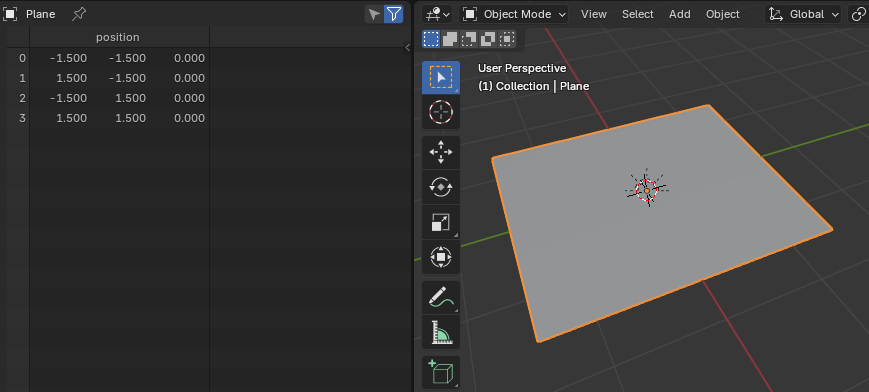

Let's start to pipe data into these vertices!

In [4]:
num_vertices = len(plane.data.vertices)
num_vertices

4

In [11]:
vertices = [(v.co.x, v.co.y, v.co.z) for v in plane.data.vertices]
import pandas as pd
df = pd.DataFrame(vertices, columns=['X', 'Y', 'Z'])
df

,X,Y,Z
0,-1.5,-1.5,0.0
1,1.5,-1.5,0.0
2,-1.5,1.5,0.0
3,1.5,1.5,0.0


Added attribute 'my_float' with value 3.14 to each vertex.


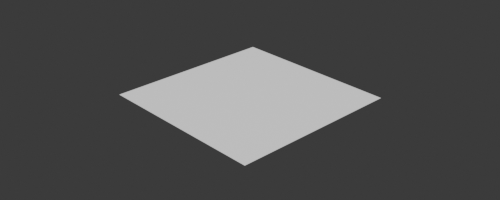

In [14]:
attr_name = 'my_float'
value = 3.14

# 'POINT' domain means each vertex gets the value
attr = plane.data.attributes.new(name=attr_name,type='FLOAT',domain='POINT')
values = [value] * len(plane.data.vertices)
attr.data.foreach_set('value', values)
plane.data.update()

print(f"Added attribute '{attr_name}' with value {value} to each vertex.")
render_result()

Now we have that attribute stored (Screenshot from the GUI)
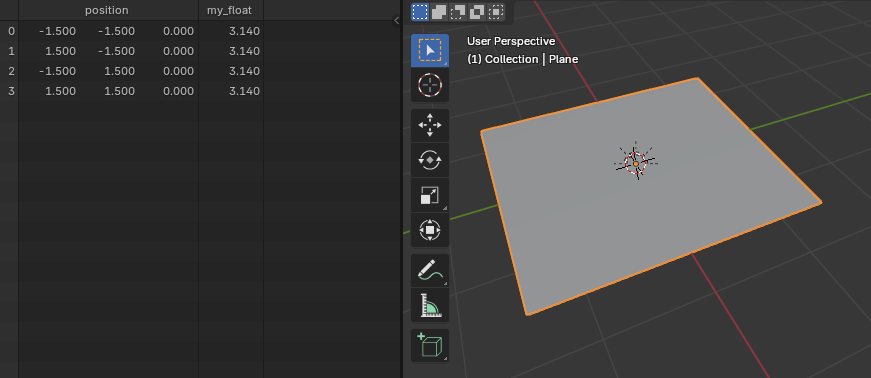

Be aware! When we run the above cell multiple times, the attribute is also created multiple times.  (Screenshot from the GUI)
# 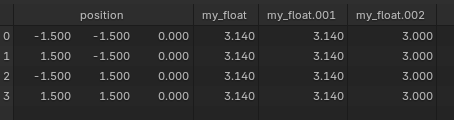

So let's better check if the attribute already exists.

Added attribute 'my_float' with value 4.2 to each vertex.


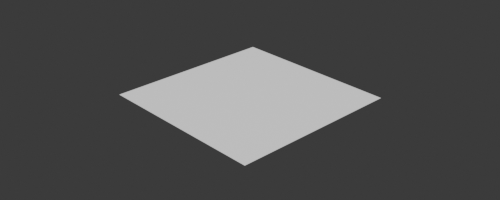

In [16]:
attr_name = 'my_float'
value = 4.2

attr = plane.data.attributes.get(attr_name)
if attr is None:
    attr = plane.data.attributes.new(name=attr_name,type='FLOAT',domain='POINT')
values = [value] * len(plane.data.vertices)
attr.data.foreach_set('value', values)
plane.data.update()

print(f"Added attribute '{attr_name}' with value {value} to each vertex.")
render_result()

In [17]:
# we can confirm this by checking with a dataframe:
df = pd.DataFrame({
    'X': [v.co.x for v in plane.data.vertices],
    'Y': [v.co.y for v in plane.data.vertices],
    'Z': [v.co.z for v in plane.data.vertices],
    'my_float': [val.value for val in plane.data.attributes['my_float'].data]
})

df

,X,Y,Z,my_float
0,-1.5,-1.5,0.0,4.2
1,1.5,-1.5,0.0,4.2
2,-1.5,1.5,0.0,4.2
3,1.5,1.5,0.0,4.2
